In [34]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv(r'C:\Users\parth\Kaggle\Al-Bundy_raw-data.csv')

In [3]:
dt.drop(['InvoiceNo','ProductID','Size (Europe)','Size (UK)'], axis =1, inplace = True)

In [4]:
dt.shape

(14967, 10)

In [5]:
dt.head()

,Date,Country,Shop,Gender,Size (US),UnitPrice,Discount,Year,Month,SalePrice
0,1/1/2014,United Kingdom,UK2,Male,11.0,159,0.0,2014,1,159.0
1,1/1/2014,United States,US15,Male,11.5,199,0.2,2014,1,159.2
2,1/1/2014,Canada,CAN7,Male,9.5,149,0.2,2014,1,119.2
3,1/1/2014,United States,US6,Female,9.5,159,0.0,2014,1,159.0
4,1/1/2014,United Kingdom,UK4,Female,9.0,159,0.0,2014,1,159.0


In [6]:
dt['Gender'] = dt['Gender'].str.strip()
dt = dt[dt['Country']=='United States']

In [7]:
dt.isnull().sum()

Date         0
Country      0
Shop         0
Gender       0
Size (US)    0
UnitPrice    0
Discount     0
Year         0
Month        0
SalePrice    0
dtype: int64

In [8]:
mdt = dt[dt['Gender'] == 'Male']
fdt = dt[dt['Gender'] == 'Female']

In [9]:
avgmdt=pd.DataFrame(mdt.groupby(['Size (US)', 'Month']).count()['SalePrice'])

In [10]:
avgmdt.rename(columns = {'SalePrice':'Units'}, inplace = True)

In [11]:
avgmdt.reset_index(inplace=True)

In [12]:
avgmdt.head()

,Size (US),Month,Units
0,6.0,1,4
1,6.0,2,3
2,6.0,3,3
3,6.0,4,1
4,6.0,5,6


In [13]:
se = []
tmp = []
for i in avgmdt['Size (US)'].drop_duplicates():
    tmp.append(list(avgmdt[avgmdt['Size (US)'] == i]['Units']))
    se.append(stats.sem(tmp, axis=1))
    tmp=[]

In [14]:
se

[array([0.85763465]),
 array([0.81649658]),
 array([0.73711148]),
 array([0.8738629]),
 array([1.41488301]),
 array([1.28584956]),
 array([2.96187901]),
 array([3.00788106]),
 array([3.27785268]),
 array([2.51209197]),
 array([1.2005365]),
 array([1.33711585]),
 array([1.19433927]),
 array([0.69041051]),
 array([0.56407607]),
 array([0.42687495])]

In [15]:
sz = list(avgmdt['Size (US)'].drop_duplicates())

In [16]:
c=0
nw = pd.DataFrame()
for i in sz:
    temp = avgmdt.loc[avgmdt['Size (US)']==i]
    temp['SE']=se[c][0]
    nw = nw.append(temp)
    c+=1
    

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [17]:
nw.head()

,Size (US),Month,Units,SE
0,6.0,1,4,0.857635
1,6.0,2,3,0.857635
2,6.0,3,3,0.857635
3,6.0,4,1,0.857635
4,6.0,5,6,0.857635


In [18]:
avgmdt = nw
del(temp,c,nw)

In [19]:
p = 0.975
df = 11
avgmdt['t'] = stats.t.ppf(p,df)


In [20]:
avgmdt['Margin Error'] = avgmdt['SE']*avgmdt['t']
avgmdt['Upper Limit'] = avgmdt['Units']+avgmdt['Margin Error'].apply(np.ceil)
avgmdt['Lower Limit'] = avgmdt['Units']-avgmdt['Margin Error'].apply(np.ceil)


In [60]:
avgmdt['SalePrice'] = avgmdt['Size (US)'].map(dt.drop_duplicates('Size (US)')\
                                                   .set_index('Size (US)')['SalePrice'])
avgmdt['ID'] = (avgmdt['Size (US)'] + avgmdt['Month']).apply(str)
dt['ID'] = (dt['Size (US)'] + dt['Month']).apply(str)
avgmdt['Discount'] = avgmdt['ID'].map(dt.drop_duplicates('ID')\
                                                  .set_index(['ID'])['Discount'])
avgmdt['Rev'] = avgmdt['SalePrice']*avgmdt['Units']
avgmdt.drop(['ID'], inplace=True, axis=1)
avgmdt['SalePrice'] = avgmdt['SalePrice'].astype(object)
avgmdt['Discount'] = avgmdt['Discount']*100
avgmdt.head(25)

,Size (US),Month,Units,SE,t,Margin Error,Upper Limit,Lower Limit,SalePrice,Rev,Discount
0,6.0,1,4,0.857635,2.200985,1.887641,6.0,2.0,179.1,716.4,10.0
1,6.0,2,3,0.857635,2.200985,1.887641,5.0,1.0,179.1,537.3,10.0
2,6.0,3,3,0.857635,2.200985,1.887641,5.0,1.0,179.1,537.3,0.0
3,6.0,4,1,0.857635,2.200985,1.887641,3.0,-1.0,179.1,179.1,10.0
4,6.0,5,6,0.857635,2.200985,1.887641,8.0,4.0,179.1,1074.6,0.0
5,6.0,6,4,0.857635,2.200985,1.887641,6.0,2.0,179.1,716.4,50.0
6,6.0,7,4,0.857635,2.200985,1.887641,6.0,2.0,179.1,716.4,0.0
7,6.0,8,7,0.857635,2.200985,1.887641,9.0,5.0,179.1,1253.7,50.0
8,6.0,9,8,0.857635,2.200985,1.887641,10.0,6.0,179.1,1432.8,10.0
9,6.0,10,11,0.857635,2.200985,1.887641,13.0,9.0,179.1,1970.1,0.0


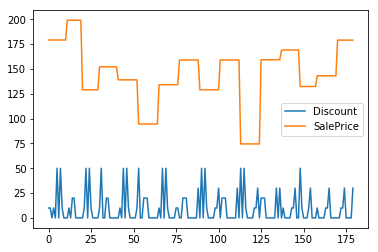

In [63]:

#Plotting the variables to check if the data is stationary
avgmdt[['Discount','SalePrice']].plot()
plt.show()

In [64]:
import statsmodels.api as sm

#ADF test for Discount series
adm = sm.tsa.stattools.adfuller(avgmdt['Discount'])
print('ADF Statistic for Marketing: %f' % adm[0])
print('p-value: %f' % adm[1])
print('Critical Values:')
for key, value in adm[4].items():
    print('\t%s: %.3f' % (key, value))

#ADF test for Sales series
ads = sm.tsa.stattools.adfuller(avgmdt['SalePrice'])
print('ADF Statistic for SalePrice: %f' % ads[0])
print('p-value: %f' % ads[1])
print('Critical Values:')
for key, value in ads[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Marketing: -8.751257
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
ADF Statistic for SalePrice: -2.913526
p-value: 0.043798
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


In [99]:
import statsmodels.api as sm
res = sm.tsa.ARMA(np.array(avgmdt["SalePrice"]), (2,2)).fit()
lb_test = sm.stats.acorr_ljungbox(res.resid, lags=10)
print('P-values are: ', lb_test[1])




P-values are:  [0.98748984 0.97212367 0.98835424 0.99462069 0.99725358 0.99846908
 0.99907878 0.99938417 0.9997885  0.99977304]
